# HW № 1

In [38]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, neighbors 

import numpy as np

In [48]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# kNN Classifier

In [49]:
dataset = datasets.make_classification(n_samples=1000, n_features =2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

In [50]:
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

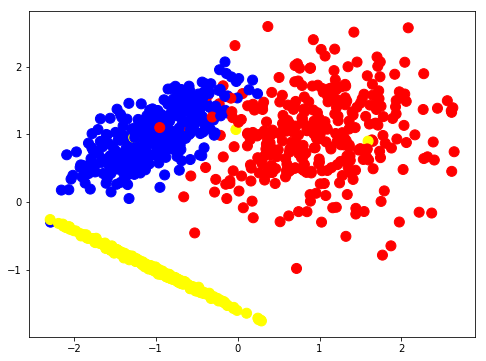

In [51]:
pylab.figure(figsize=(8,6))
pylab.scatter(map(lambda x: x[0], dataset[0]), map(lambda x: x[1], dataset[0]), 
              c=dataset[1], cmap=colors, s=100)

In [52]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(dataset[0], 
                                                                                     dataset[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

In [53]:
clf = neighbors.KNeighborsClassifier()
clf.fit(train_data, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [54]:
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)

0.97666666666666668

In [55]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [56]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

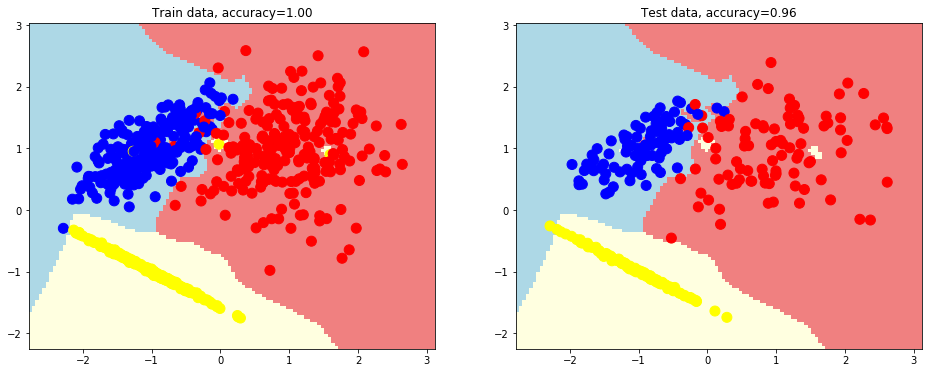

In [57]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

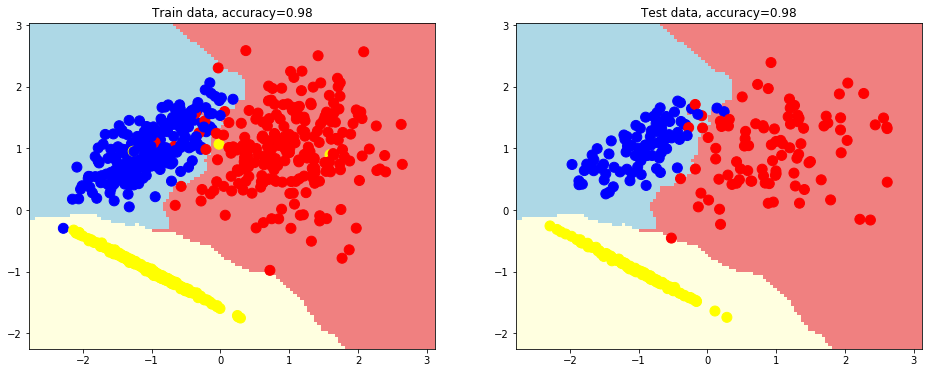

In [58]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

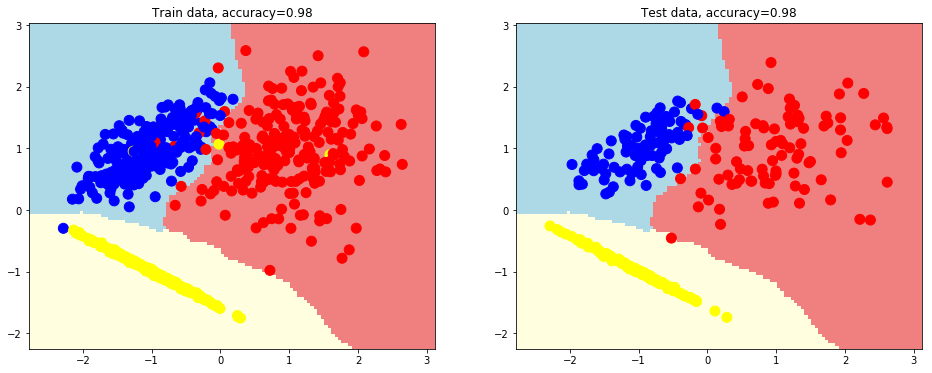

In [59]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [60]:
temp = []
for k in range(1,20):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_data, train_labels)
    predictions = clf.predict(test_data)
    cnt = metrics.accuracy_score(test_labels, predictions)
    temp.append([cnt])
x = range(1,20)

In [61]:
import matplotlib.pyplot as plt

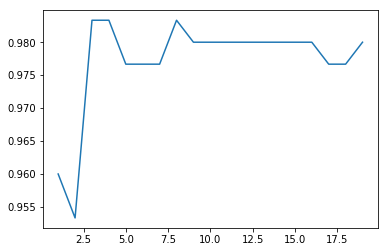

In [62]:
plt.plot(x,temp)

# Naive Bayes

In [5]:
from sklearn import model_selection, datasets
from sklearn.model_selection import cross_val_score
import numpy as np

In [9]:
digits = datasets.load_digits()
breast_cancer = datasets.load_breast_cancer()

In [28]:
import pandas as pd
digits_tmp = pd.DataFrame(datasets.load_digits().data)
digits_tmp.head(10)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [29]:
breast_cancer_tmp = pd.DataFrame(datasets.load_breast_cancer().data)
breast_cancer_tmp.head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [10]:
X_digits = digits.data
y_digits = digits.target

In [15]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
score = clf.fit(X_digits , y_digits)
print(np.mean(cross_val_score(score, X_digits, y_digits))) 

0.825823650778


In [17]:
from sklearn.naive_bayes import MultinomialNB
clf_bern = MultinomialNB()
score_bern = clf_bern.fit(X_digits , y_digits)
print(np.mean(cross_val_score(score_bern, X_digits, y_digits))) 

0.870877148974


In [20]:
from sklearn.naive_bayes import GaussianNB
clf_gaus = GaussianNB()
score_gaus = clf_gaus.fit(X_digits , y_digits)
print(np.mean(cross_val_score(score_gaus, X_digits, y_digits))) 

0.818600380355


In [21]:
X_breast_cancer = breast_cancer.data
y_breast_cancer = breast_cancer.target

In [22]:
clf_breast = BernoulliNB()
score_breast = clf_breast.fit(X_breast_cancer , y_breast_cancer)
print(np.mean(cross_val_score(score_breast, X_breast_cancer, y_breast_cancer))) 

0.627420402859


In [23]:
clf_bern_breast = MultinomialNB()
score_bern_breast = clf_bern.fit(X_breast_cancer , y_breast_cancer)
print(np.mean(cross_val_score(score_bern_breast, X_breast_cancer, y_breast_cancer))) 

0.894579040193


In [24]:
clf_gaus_breast = GaussianNB()
score_gaus_breast = clf_gaus.fit(X_breast_cancer, y_breast_cancer )
print(np.mean(cross_val_score(score_gaus_breast, X_breast_cancer, y_breast_cancer))) 

0.936749280609


1. Max качество классификации на breast_cancer = 0.936749280609[GaussianNB]
2. Max качество классификации на digits = 0.870877148974[MultinomialNB]
3. C, D

# Метрики в задаче регрессии

In [58]:
import numpy as np 

L = 500

x= np.linspace(-5,5,L)


In [59]:
def true_poly(x):
    return 1+0.5*x + 0.4472**np.random.randn(L)

y = true_poly(x)

In [60]:
import matplotlib.pylab as plt 
%matplotlib inline

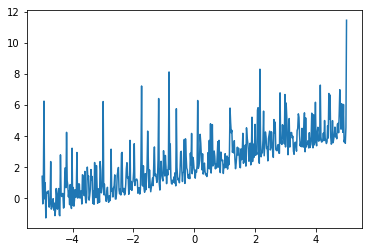

In [61]:
plt.plot(x,y)

In [62]:
def poly(x, coefs):
    return sum([coefs[k]*x**k for k in range(len(coefs))])

In [71]:
C = 0.5
def loss(coefs):
    loss = 0.0
    loss +=sum((poly(x,coefs)-y)**2)
    loss = loss/L
    return loss

In [88]:
from scipy.optimize import minimize

result = minimize(loss, np.array([0.001]*10))

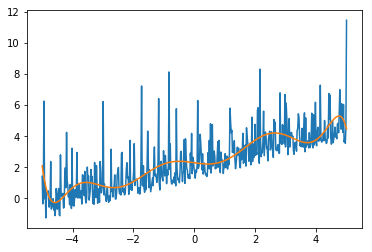

In [89]:
plt.plot(x,y)
t =np.linspace(-5,5,500)
plt.plot(t,poly(t,result.x))
plt.show()

In [90]:
x_noise= np.linspace(-5,5,75)

def true_poly_noise(x):
    return -1 + 0.4472**np.random.randn(75)

y_noise = true_poly_noise(x_noise)
x_new = np.concatenate((x, x_noise))
T = len(x_new)
y_new = np.concatenate((y, y_noise))

In [91]:
def poly_new(x, coefs):
    return sum([coefs[k]*x**k for k in range(len(coefs))])

In [92]:
def loss_new(coefs):
    loss = 0.0
    loss +=sum((poly(x,coefs)-y)**2)
    loss = loss/T
    return loss

In [102]:
from scipy.optimize import minimize

res = minimize(loss_new, np.array([0.001]*10))

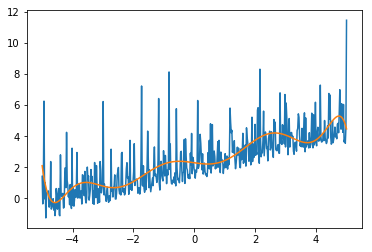

In [103]:
plt.plot(x,y)
trr =np.linspace(-5,5,575)
plt.plot(trr,poly_new(trr,res.x))
plt.show()

In [104]:
def loss_mae(coefs):
    loss = 0.0
    loss +=sum(np.absolute(poly(x,coefs)-y))
    loss = loss/T
    return loss

In [111]:
from scipy.optimize import minimize

resMae = minimize(loss_mae, np.array([0.001]*11))

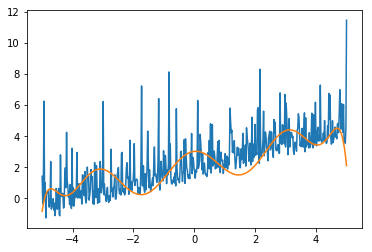

In [112]:
plt.plot(x,y)
trrMae =np.linspace(-5,5,575)
plt.plot(trrMae,poly_new(trrMae,resMae.x))
plt.show()

Модель с функционалом MAE больше устойчива к выбросам, так как штраф за сильное отклонение гораздо меньше. Модель с функционалом MSE сильно штрафует за большие ошибки, так как отклонения возводятся в квадрат. Штраф на выбросе будет очень сильным, и алгоритм будет настраиваться на выбросы.

# Decision Tree

In [4]:
import pydotplus as pdt 
import pandas as pd

from sklearn import tree

df = pd.read_csv('1.csv')
print(df.head(5))

   Creditability  Account Balance  Duration of Credit (month)  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment Status of Previous Credit  Purpose  Credit Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value Savings/Stocks  Length of current employment  Instalment per cent  \
0                     1                             2                    4   
1                     1                             3               

In [5]:
x_train = df.ix[:, df.columns != 'Creditability']
y_train = df['Creditability']

In [6]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
dot_data = tree.export_graphviz(model, out_file="small_tree.out", 
                         filled=True, rounded=True,  
                         special_characters=True)

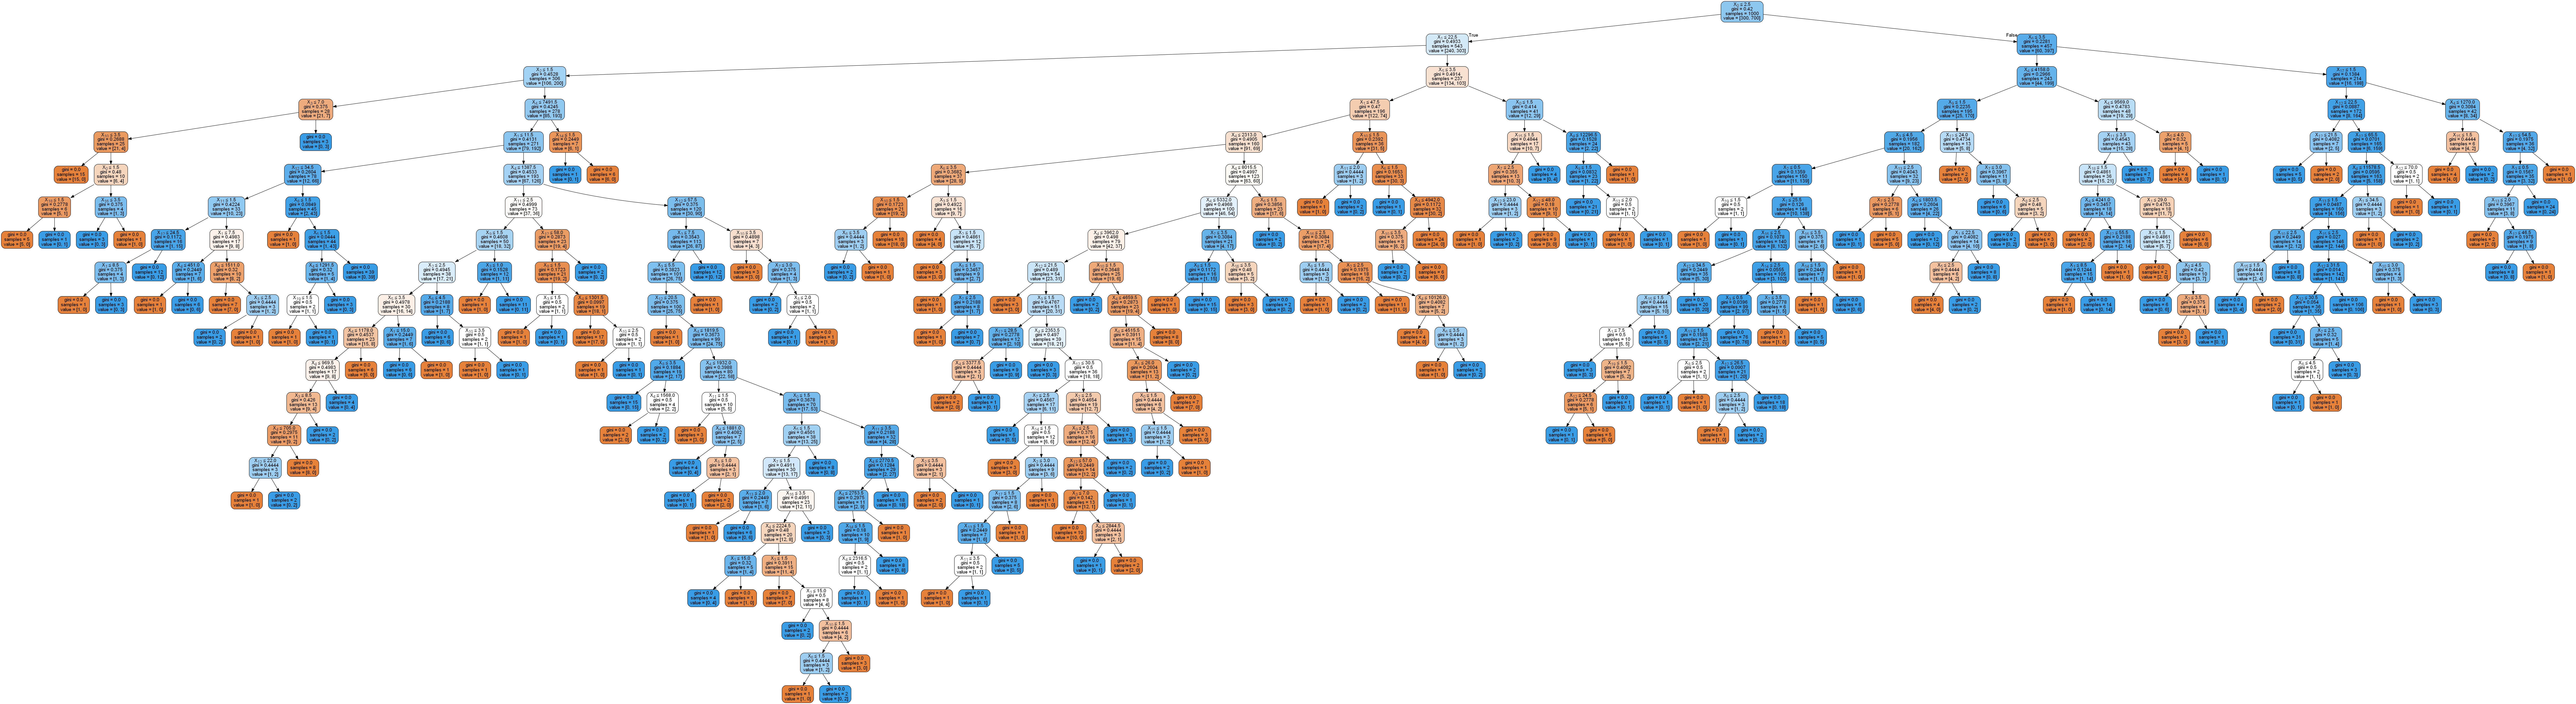

In [9]:
from IPython.display import Image
graph = pdt.graphviz.graph_from_dot_file("small_tree.out")  
Image(graph.create_png())